# Обучаем первые классификаторы в sklearn

### Данные

Задача на kaggle: https://www.kaggle.com/c/bioresponse

Данные: https://www.kaggle.com/c/bioresponse/data

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response).

Признаки нормализованы.

Для демонстрации используется обучающая выборка из исходных данных train.csv, файл с данными прилагается.

### Готовим обучающую и тестовую выборки

In [1]:
import pandas as pd

bioresponce = pd.read_csv('bioresponse.csv', sep=',')

In [2]:
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = bioresponce['Activity'].values

In [7]:
print y

[1 1 1 ..., 0 1 0]


In [8]:
bioresponce.iloc[:2, :5]

,Activity,D1,D2,D3,D4
0,1,0.000000,0.497009,0.10,0.0
1,1,0.366667,0.606291,0.05,0.0


In [9]:
X = bioresponce.iloc[:, 1:]

In [10]:
X

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.00,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.00,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.00,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.50,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.00,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0
5,0.133333,0.771035,0.20,0.25,0.122153,0.677398,0.267224,0.611112,0.701421,0.330917,...,0,0,0,0,0,0,0,0,0,0
6,0.066700,0.567401,0.10,0.00,0.116578,0.689802,0.274886,0.548509,0.785429,0.252416,...,0,0,0,0,0,0,0,0,0,0
7,0.133333,0.610057,0.15,0.00,0.105176,0.759602,0.313393,0.491790,0.756010,0.337262,...,0,0,1,0,1,0,0,0,0,0
8,0.000000,0.776816,0.05,0.00,0.458446,0.738631,0.246347,0.067800,0.751861,0.215476,...,0,0,0,0,0,0,0,0,0,0
9,0.100000,0.768150,0.10,0.25,0.262299,0.598972,0.377065,0.394514,0.673797,0.343472,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import numpy as np
print np.sum(y)

2034


In [12]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


### Строим модель и оцениваем качество

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [15]:
print sum(preds == y_test) / len(preds)

0


In [16]:
print sum(preds == y_test) / float(len(preds))

0.717285945073


In [17]:
from sklearn.metrics import accuracy_score

print accuracy_score(preds, y_test)

0.717285945073


### Качество на кросс-валидации

In [18]:
from sklearn.cross_validation import cross_val_score

print cross_val_score(model, X_train, y_train, cv=5)

[ 0.70238095  0.70974155  0.71713147  0.74103586  0.7250996 ]


In [19]:
print cross_val_score(model, X_train, y_train, cv=5).mean()

0.718266050318


### Пробуем другие классификаторы

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100), 
    GradientBoostingClassifier(n_estimators=100)
]

for model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print accuracy_score(preds, y_test), model

0.718901453958 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
0.711631663974 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.78352180937 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.779483037157 GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
    

## Задание на 10 минут:

1. Откройте этот блокнот у себя на компьютере, если у вас есть Python, pandas и sklearn, либо воспользуйтесь помощью соседа (если у него все установлено)
1. Попробуйте разные классификаторы с разными параметрами и постарайтесь добиться максимального качества на тестовой выборке

Над этим заданием можно работать в группах. Если у вас нет возможности выполнить его на занятии - попробуйте, когда окажетесь дома.

In [28]:
from tqdm import tqdm

In [60]:
accuracies_train = []
accuracies_test = []

n_estimators_ = np.arange(1, 501, 10)

for i in tqdm(n_estimators_):
    
    RF = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=1, n_jobs=-1)
    RF.fit(X_train, y_train)
    preds_train = RF.predict(X_train)
    preds_test = RF.predict(X_test)
    accuracies_train.append(accuracy_score(preds_train, y_train))
    accuracies_test.append(accuracy_score(preds_test, y_test))

100%|██████████| 50/50 [01:59<00:00,  4.33s/it]


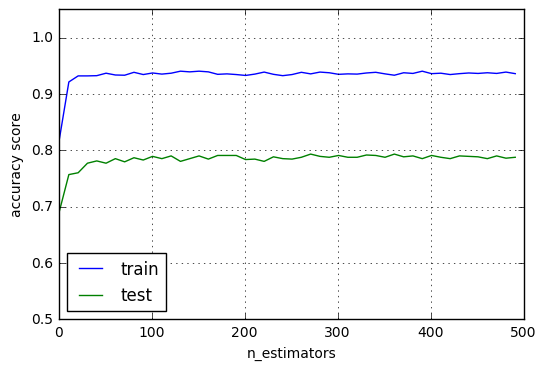

In [61]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure('accuracies per n_estimators')
plt.grid(True)
plt.plot(n_estimators_, accuracies_train, label = 'train')
plt.plot(n_estimators_, accuracies_test, label = 'test')
plt.legend(loc='best')
plt.ylim(0.5, 1.05)
plt.ylabel('accuracy score')
plt.xlabel('n_estimators')
plt.show()

## А если немного подумать

Попытайтесь оценить значение параметров max_depth, min_samples_leaf для следующих графиков

In [52]:
from PIL import Image

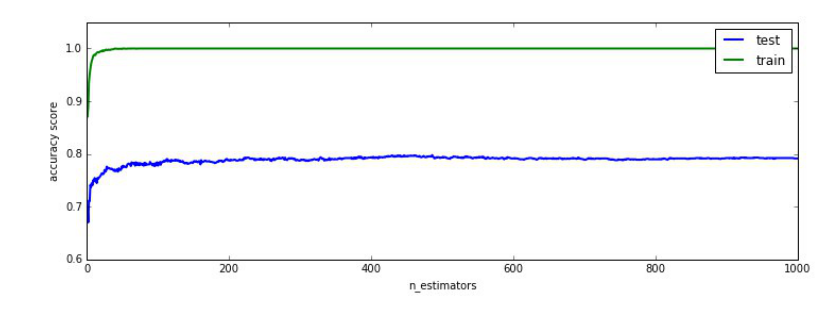

In [57]:
img = Image.open('1.jpg')
plt.figure(figsize=(10,5))
plt.imshow(img)
plt.axis('off')
plt.show()

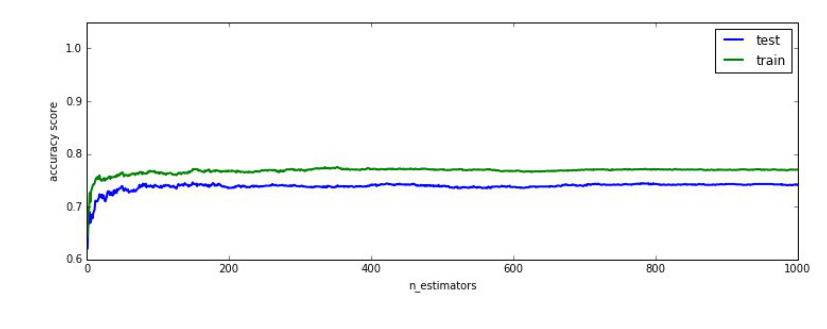

In [58]:
img = Image.open('2.jpg')
plt.figure(figsize=(10,5))
plt.imshow(img)
plt.axis('off')
plt.show()

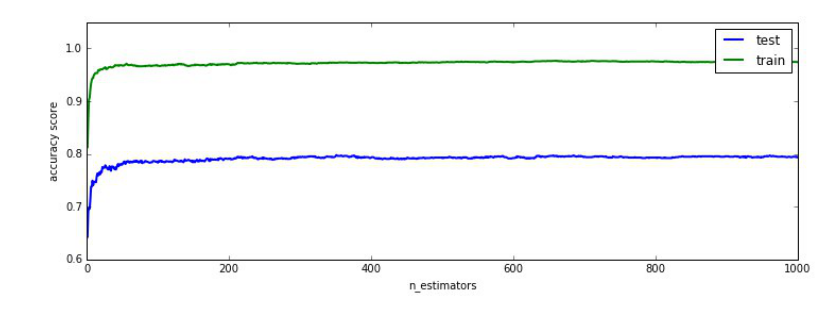

In [59]:
img = Image.open('3.jpg')
plt.figure(figsize=(10,5))
plt.imshow(img)
plt.axis('off')
plt.show()